In [9]:
import matplotlib.pyplot as plt
import json
from Paras import Para
import numpy as np
import seaborn as sn
import pandas as pd

# Training

In [10]:
with open('./logsCnnModel.json', 'r') as f:
    cnn = json.load(f)
with open('./logsMambaVisionAugModel.json', 'r') as f:
    MambaVisionAug = json.load(f)
with open('./logsMambaVisionModel.json', 'r') as f:
    MambaVision = json.load(f)
with open('./logsDinoModel.json', 'r') as f:
    Dino = json.load(f)

## Loss

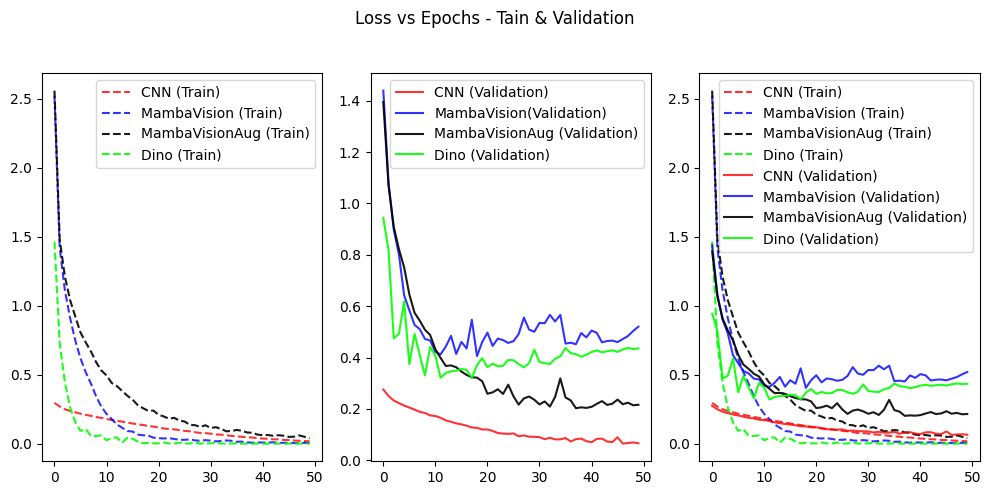

In [11]:
epoch_limit = 50
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_loss'][:epoch_limit], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(MambaVision['train_loss'][:epoch_limit], '--', color=(0,0,1,0.8), label='MambaVision (Train)')
plt.plot(MambaVisionAug['train_loss'][:epoch_limit], '--', color=(0,0,0,0.9), label='MambaVisionAug (Train)')
plt.plot(Dino['train_loss'][:epoch_limit], '--', color=(0,1,0,0.9), label='Dino (Train)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_loss'][:epoch_limit], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(MambaVision['valid_loss'][:epoch_limit], '-', color=(0,0,1,0.8), label='MambaVision(Validation)')
plt.plot(MambaVisionAug['valid_loss'][:epoch_limit], '-', color=(0,0,0,0.9), label='MambaVisionAug (Validation)')
plt.plot(Dino['valid_loss'][:epoch_limit], '-', color=(0,1,0,0.9), label='Dino (Validation)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_loss'][:epoch_limit], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(MambaVision['train_loss'][:epoch_limit], '--', color=(0,0,1,0.8), label='MambaVision (Train)')
plt.plot(MambaVisionAug['train_loss'][:epoch_limit], '--', color=(0,0,0,0.9), label='MambaVisionAug (Train)')
plt.plot(Dino['train_loss'][:epoch_limit], '--', color=(0,1,0,0.9), label='Dino (Train)')
plt.plot(cnn['valid_loss'][:epoch_limit], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(MambaVision['valid_loss'][:epoch_limit], '-', color=(0,0,1,0.8), label='MambaVision (Validation)')
plt.plot(MambaVisionAug['valid_loss'][:epoch_limit], '-', color=(0,0,0,0.9), label='MambaVisionAug (Validation)')
plt.plot(Dino['valid_loss'][:epoch_limit], '-', color=(0,1,0,0.9), label='Dino (Validation)')
plt.legend(loc="upper right")
plt.suptitle('Loss vs Epochs - Tain & Validation')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Accuracy

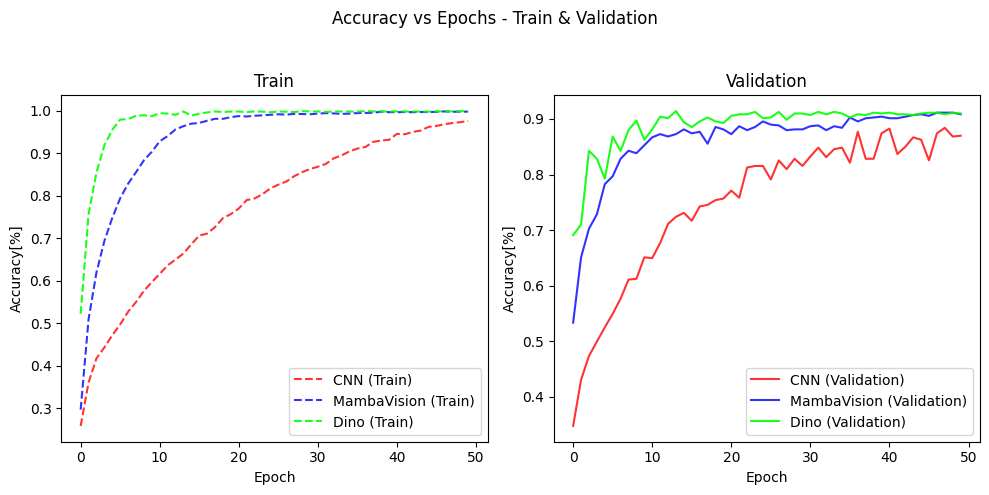

In [30]:
epoch_limit = 50

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn['train_accu'][:epoch_limit], '--', color=(1,0,0,0.8), label='CNN (Train)')
plt.plot(MambaVision['train_accu'][:epoch_limit], '--', color=(0,0,1,0.8), label='MambaVision (Train)')
plt.plot(Dino['train_accu'][:epoch_limit], '--', color=(0,1,0,0.9), label='Dino (Train)')
plt.legend(loc="best")
plt.title('Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy[%]')
plt.subplot(1, 2, 2)
plt.plot(cnn['valid_accu'][:epoch_limit], '-', color=(1,0,0,0.8), label='CNN (Validation)')
plt.plot(MambaVision['valid_accu'][:epoch_limit], '-', color=(0,0,1,0.8), label='MambaVision (Validation)')
plt.plot(Dino['valid_accu'][:epoch_limit], '-', color=(0,1,0,0.9), label='Dino (Validation)')
plt.legend(loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy[%]')
plt.title('Validation')
plt.suptitle('Accuracy vs Epochs - Train & Validation')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

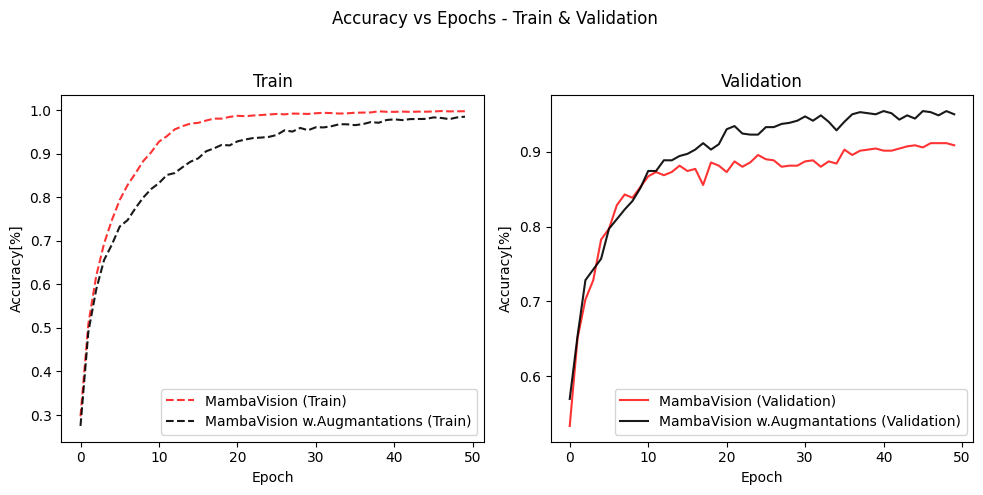

In [31]:
## Only Mamba
epoch_limit = 50
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(MambaVision['train_accu'][:epoch_limit], '--', color=(1,0,0,0.8), label='MambaVision (Train)')
plt.plot(MambaVisionAug['train_accu'][:epoch_limit], '--', color=(0,0,0,0.9), label='MambaVision w.Augmantations (Train)')
plt.legend(loc="best")
plt.title('Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy[%]')
plt.subplot(1, 2, 2)
plt.plot(MambaVision['valid_accu'][:epoch_limit], '-', color=(1,0,0,0.8), label='MambaVision (Validation)')
plt.plot(MambaVisionAug['valid_accu'][:epoch_limit], '-', color=(0,0,0,0.9), label='MambaVision w.Augmantations (Validation)')
plt.legend(loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy[%]')
plt.title('Validation')
plt.suptitle('Accuracy vs Epochs - Train & Validation')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Confusion Matrix

In [14]:
cnn_m, MambaVision_m, MambaVisionAug_m, Dino_m= np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10))

In [15]:
with open('logsCnnMatrix.json', 'r') as f:
    cnn_l = json.load(f)
with open('logsMambaVisionMatrix.json', 'r') as f:
    MambaVision_l = json.load(f)
with open( 'logsMambaVisionAugMatrix.json', 'r') as f:
    MambaVisionAug_l = json.load(f)
with open( 'logsDinoMatrix.json', 'r') as f:
    Dino_l = json.load(f)

In [16]:
for point in cnn_l:
    i, j = point
    cnn_m[i][j] += 1
    
for point in MambaVision_l:
    i, j = point
    MambaVision_m[i][j] += 1

for point in MambaVisionAug_l:
    i, j = point
    MambaVisionAug_m[i][j] += 1

for point in Dino_l:
    i, j = point
    Dino_m[i][j] += 1

In [17]:
cnn_m/=sum(cnn_m)
MambaVision_m/=sum(MambaVision_m)
MambaVisionAug_m/=sum(MambaVisionAug_m)
Dino_m/=sum(Dino_m)

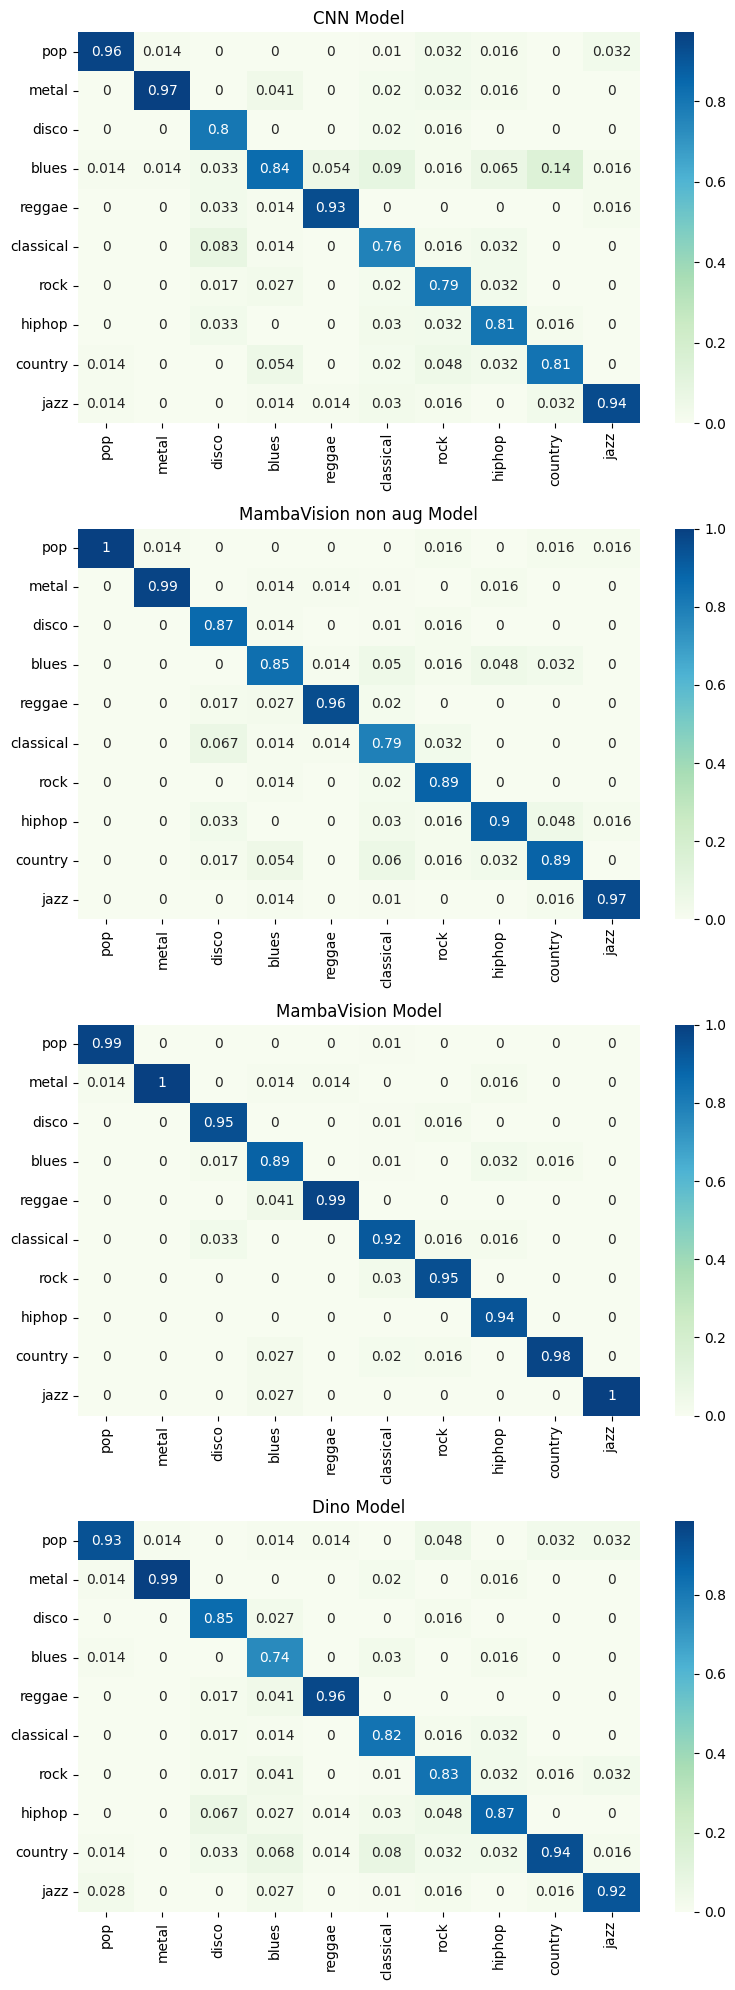

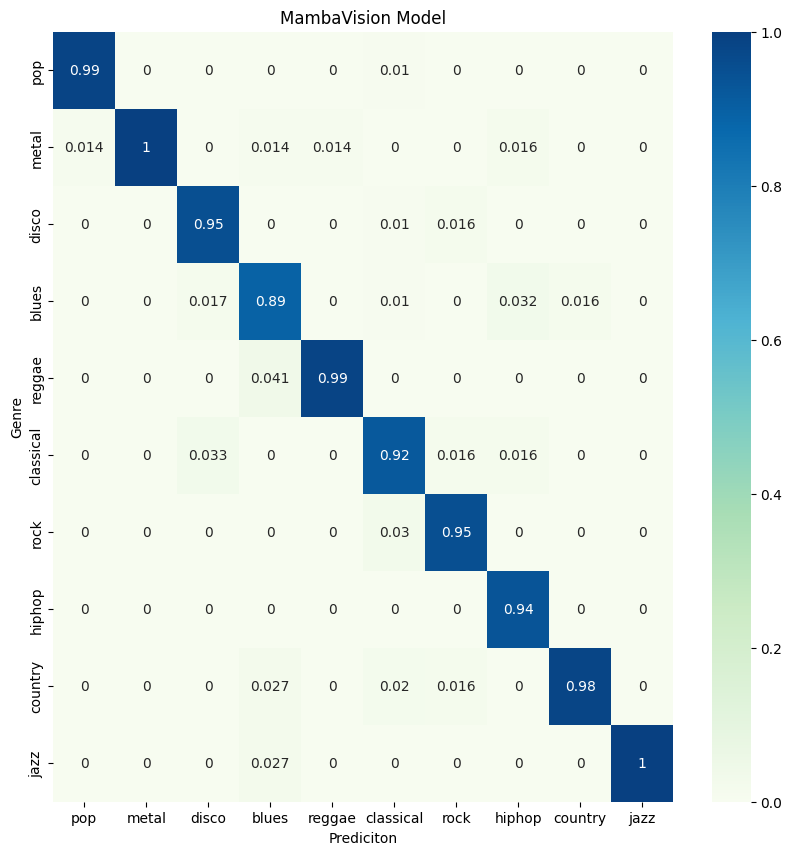

In [29]:
cnn_m = pd.DataFrame(cnn_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
MambaVision_m = pd.DataFrame(MambaVision_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
MambaVisionAug_m = pd.DataFrame(MambaVisionAug_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
Dino_m = pd.DataFrame(Dino_m, index = [Para.dictionary.get(i) for i in range(10)],
                  columns = [Para.dictionary.get(i) for i in range(10)],)
plt.figure(figsize=(8, 20))
plt.subplot(4, 1, 1)
plt.title('CNN Model')
sn.heatmap(cnn_m, annot=True, cmap='GnBu')
plt.subplot(4, 1, 2)
plt.title('MambaVision non aug Model')
sn.heatmap(MambaVision_m, annot=True, cmap='GnBu')
plt.subplot(4, 1, 3)
plt.title('MambaVision Model')
sn.heatmap(MambaVisionAug_m, annot=True, cmap='GnBu')
plt.subplot(4, 1, 4)
plt.title('Dino Model')
sn.heatmap(Dino_m, annot=True, cmap='GnBu')
plt.tight_layout()
plt.savefig('matrix.png')
plt.figure(figsize=(10, 10))
plt.title('MambaVision Model')
# Use cmap for green-blue color scheme
sn.heatmap(MambaVisionAug_m, annot=True, cmap='GnBu')
plt.savefig('matrix.png')
plt.xlabel('Prediciton')
plt.ylabel('Genre')
plt.show()

